# **Final Project Task 3 - Census Modeling Regression**

Requirements
- Create a regression model on the Census dataset, with 'hours-per-week' target

- You can use models (estmators) from sklearn, but feel free to use any library for traditional ML. 
    - Note: in sklearn, the LinearRegression estimator is based on OLS, a statistical method. Please use the SGDRegressor estimator, since this is based on gradient descent. 
    - You can use LinearRegression estimator, but only as comparison with the SGDRegressor - Optional.

- Model Selection and Setup **2p**:
    - Implement multiple models, to solve a regression problem using traditional ML: 
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression - Optional
        - Ridge Regression - Optional
        - Lasso Regression - Optional
    - Choose a loss (or experiment with different losses) for the model and justify the choice. *1p*
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons. *1p*


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation **10p**
    - Establish a Baseline Model *2p*
        - For each model type, train a simple model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable. - Optional
    - Feature Selection: - Optional
        - Use insights from EDA in Task 2 to identify candidate features by analyzing patterns, relationships, and distributions.
    - Experimentation: *8p*
        - For each baseline model type, iteratively experiment with different combinations of features and transformations.
        - Experiment with feature engineering techniques such as interaction terms, polynomial features, or scaling transformations.
        - Identify the best model which have the best performance metrics on test set.
        - You may need multiple preprocessed datasets preprocessed
- Hyperparameter Tuning - Optional
  - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments. 
  - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
  - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
  - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation **3p**
    - Evaluate models on the test dataset using regression metrics: *1p*
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice *1p*
    - Compare the results across different models. Save all experiment results  into a table. *1p*

Feature Importance - Optional
- For applicable models (e.g., Decision Tree Regression), analyze feature importance and discuss its relevance to the problem.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


In [56]:
import pandas as pd

In [57]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
20952,22,State-gov,309348,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,15,United-States,<=50K
7396,18,Private,116528,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Male,0,0,30,United-States,<=50K
5355,35,Private,40135,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,2042,40,United-States,<=50K
27547,50,Self-emp-not-inc,27539,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,7688,0,40,United-States,>50K
11348,21,Private,132320,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,35,United-States,<=50K
23704,21,Private,335570,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,30,?,<=50K
27618,49,Private,304416,11th,7,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States,<=50K
639,52,Self-emp-not-inc,289436,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
6856,17,Private,171080,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,12,United-States,<=50K
4579,43,Private,108945,Some-college,10,Divorced,Prof-specialty,Unmarried,White,Female,0,0,38,United-States,<=50K


In [58]:
##importing the required library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  # <- aici adaugăm PolynomialFeatures
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [59]:
# Încărcarea datelor Census originale
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]
data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data = data.dropna() 

In [60]:
# Codificarea variabilelor categorice
for col in data.select_dtypes('object').columns:
    data[col] = data[col].astype('category').cat.codes

C:\Users\User\AppData\Local\Temp\ipykernel_18576\1351615278.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in data.select_dtypes('object').columns:


In [61]:
# Separarea caracteristicilor (features) și a variabilei țintă (target)
X = data.drop('hours-per-week', axis=1)
y = data['hours-per-week']

In [62]:
# Împărțirea datelor în Train / Validation / Test (~60/20/20)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)


In [63]:
# Scalarea datelor pentru modelele bazate pe gradient
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [64]:
# Caracteristici polinomiale pentru modelele liniare
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [65]:
# Funcții ajutătoare
def evaluate_model(name, model, X, y):
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, preds)
    r2 = r2_score(y, preds)
    return {'Model': name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

def run_and_show(name, model, X_train_model, y_train_model, X_val_model, y_val_model):
    model.fit(X_train_model, y_train_model)
    res = evaluate_model(name, model, X_val_model, y_val_model)
    results_list.append(res)
    print(f"\n✅ {name}: MAE={res['MAE']:.2f}, RMSE={res['RMSE']:.2f}, R2={res['R2']:.2f}")
    return res

results_list = []


In [66]:
#  Modele de bază
sgd_base = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
run_and_show('SGD Baseline', sgd_base, X_train_scaled, y_train, X_val_scaled, y_val)

lr_base = LinearRegression()
run_and_show('Linear Regression (OLS)', lr_base, X_train_scaled, y_train, X_val_scaled, y_val)

dt_base = DecisionTreeRegressor(random_state=42)
run_and_show('Decision Tree Baseline', dt_base, X_train, y_train, X_val, y_val)

rf_base = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
run_and_show('Random Forest Baseline', rf_base, X_train, y_train, X_val, y_val)



✅ SGD Baseline: MAE=8.04, RMSE=11.64, R2=0.13

✅ Linear Regression (OLS): MAE=8.01, RMSE=11.64, R2=0.13

✅ Decision Tree Baseline: MAE=10.38, RMSE=15.35, R2=-0.52

✅ Random Forest Baseline: MAE=7.75, RMSE=11.18, R2=0.20


{'Model': 'Random Forest Baseline',
 'MAE': 7.746163672194922,
 'MSE': 124.89187764302228,
 'RMSE': np.float64(11.175503462619583),
 'R2': 0.1959916686141714}

In [67]:
#  Experimente Avansate
sgd_huber = SGDRegressor(loss='huber', max_iter=2000, alpha=0.001, random_state=42)
run_and_show('SGD + Huber', sgd_huber, X_train_scaled, y_train, X_val_scaled, y_val)

sgd_elastic = SGDRegressor(loss='squared_error', penalty='elasticnet', l1_ratio=0.15, max_iter=2000, random_state=42)
run_and_show('SGD + ElasticNet', sgd_elastic, X_train_scaled, y_train, X_val_scaled, y_val)

ridge = Ridge(alpha=1.0)
run_and_show('Ridge Regression (Polynomial Features)', ridge, X_train_poly, y_train, X_val_poly, y_val)

lasso = Lasso(alpha=0.01, max_iter=5000)
run_and_show('Lasso Regression', lasso, X_train_scaled, y_train, X_val_scaled, y_val)

dt_pruned = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=42)
run_and_show('Decision Tree Pruned', dt_pruned, X_train, y_train, X_val, y_val)

rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
run_and_show('Random Forest Tuned', rf_model, X_train, y_train, X_val, y_val)

gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
run_and_show('Gradient Boosting', gb_model, X_train, y_train, X_val, y_val)



✅ SGD + Huber: MAE=7.49, RMSE=12.27, R2=0.03

✅ SGD + ElasticNet: MAE=8.04, RMSE=11.64, R2=0.13

✅ Ridge Regression (Polynomial Features): MAE=7.88, RMSE=11.37, R2=0.17

✅ Lasso Regression: MAE=8.01, RMSE=11.64, R2=0.13

✅ Decision Tree Pruned: MAE=7.61, RMSE=11.17, R2=0.20

✅ Random Forest Tuned: MAE=7.40, RMSE=10.87, R2=0.24

✅ Gradient Boosting: MAE=7.26, RMSE=10.70, R2=0.26


{'Model': 'Gradient Boosting',
 'MAE': 7.263366533094311,
 'MSE': 114.43144049485524,
 'RMSE': np.float64(10.69726322452875),
 'R2': 0.2633321456394522}

In [68]:
#  Tabel final de evaluare
results_df = pd.DataFrame(results_list)
results_df = results_df[['Model', 'RMSE', 'MAE', 'R2', 'MSE']]
print("\n=== TABEL FINAL AL EXPERIMENTELOR (Validation Set) ===")
display(results_df.sort_values(by='RMSE'))



=== TABEL FINAL AL EXPERIMENTELOR (Validation Set) ===


,Model,RMSE,MAE,R2,MSE
10,Gradient Boosting,10.697263,7.263367,0.263332,114.431440
9,Random Forest Tuned,10.868303,7.395711,0.239587,118.120004
8,Decision Tree Pruned,11.167386,7.609774,0.197159,124.710502
3,Random Forest Baseline,11.175503,7.746164,0.195992,124.891878
6,Ridge Regression (Polynomial Features),11.368005,7.877012,0.168054,129.231545
1,Linear Regression (OLS),11.643636,8.009955,0.127222,135.574254
7,Lasso Regression,11.644220,8.006289,0.127135,135.587855
5,SGD + ElasticNet,11.644857,8.042252,0.127039,135.602685
0,SGD Baseline,11.644918,8.042340,0.127030,135.604108
4,SGD + Huber,12.273450,7.486661,0.030250,150.637571


C:\Users\User\AppData\Local\Temp\ipykernel_18576\3478779000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results_df.sort_values(by='RMSE'), palette='magma')


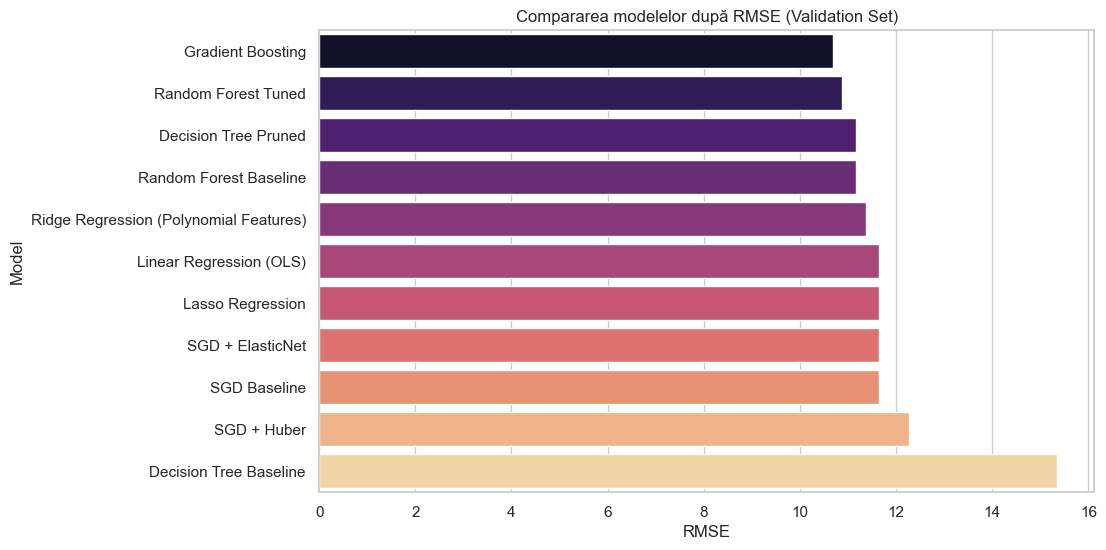

In [69]:
# Grafic comparativ RMSE
sns.barplot(x='RMSE', y='Model', data=results_df.sort_values(by='RMSE'), palette='magma')
plt.title("Compararea modelelor după RMSE (Validation Set)")
plt.xlabel("RMSE")
plt.ylabel("Model")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_18576\2626706840.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=results_df.sort_values(by='R2', ascending=False), palette='viridis')


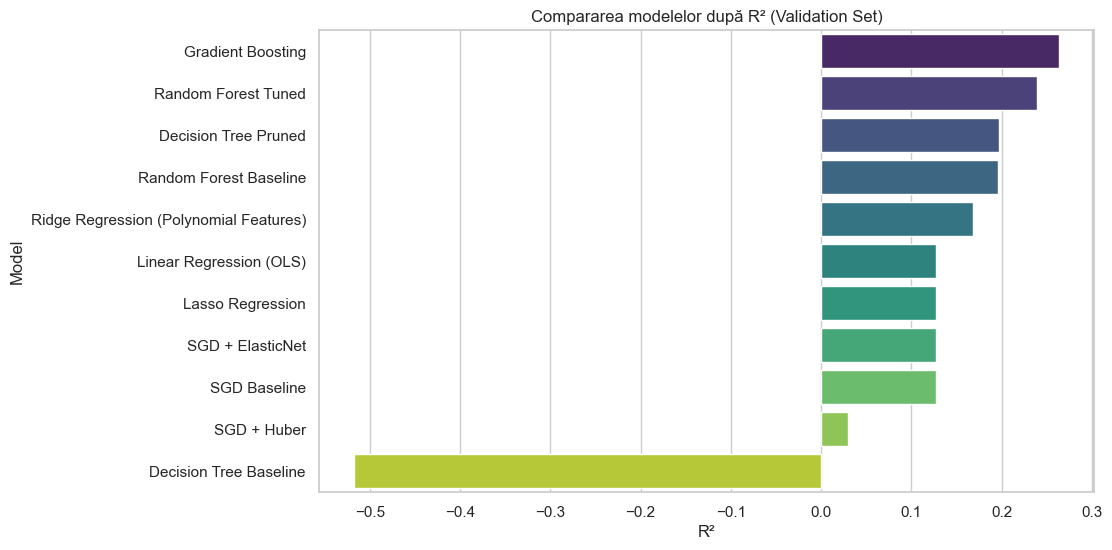

In [70]:
# Grafic comparativ R2
sns.barplot(x='R2', y='Model', data=results_df.sort_values(by='R2', ascending=False), palette='viridis')
plt.title("Compararea modelelor după R² (Validation Set)")
plt.xlabel("R²")
plt.ylabel("Model")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_18576\3366084945.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


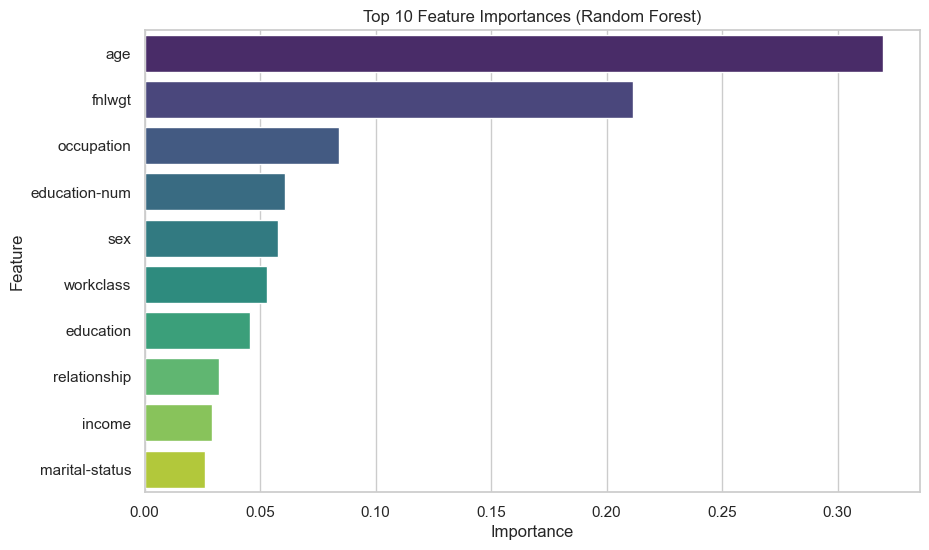

C:\Users\User\AppData\Local\Temp\ipykernel_18576\3366084945.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


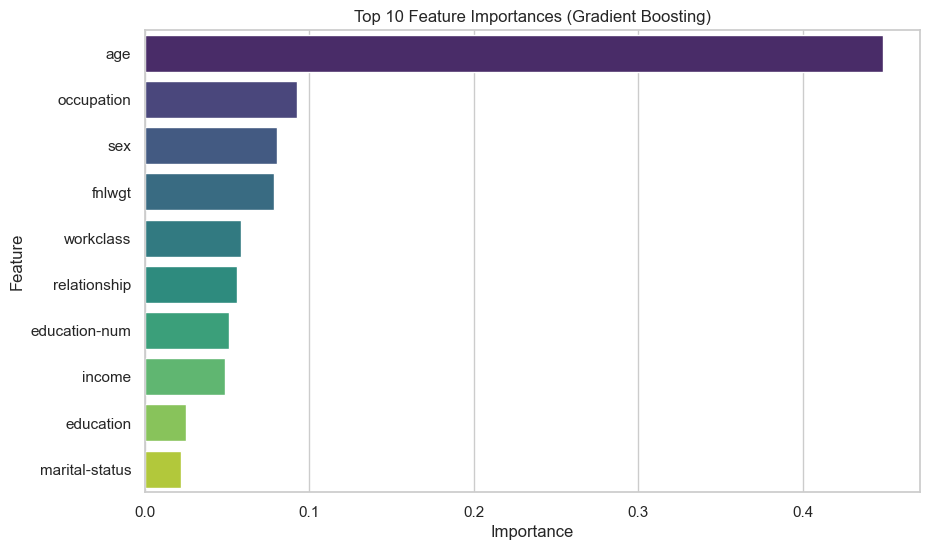

In [71]:
#  Importanța caracteristicilor
for model, name in [(rf_model, "Random Forest"), (gb_model, "Gradient Boosting")]:
    importances = model.feature_importances_
    feat_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
    plt.title(f"Top 10 Feature Importances ({name})")
    plt.show()


In [72]:
# Test Evaluare
best_models = [rf_model, gb_model]
for model in best_models:
    test_metrics = evaluate_model(f"{model.__class__.__name__} [TEST]", model, X_test, y_test)
    print(f"\n✅ {model.__class__.__name__} Test Metrics: MAE={test_metrics['MAE']:.2f}, RMSE={test_metrics['RMSE']:.2f}, R2={test_metrics['R2']:.2f}")


✅ RandomForestRegressor Test Metrics: MAE=7.27, RMSE=10.69, R2=0.26

✅ GradientBoostingRegressor Test Metrics: MAE=7.19, RMSE=10.55, R2=0.28
